> 패스트캠퍼스 바이트디그리 데이터사이언스 과정 실전 데이터 분석 및 데이터 시각화 수업 내용을 정리한 자료입니다.
> sample 데이터의 경우 패캠 저작권 문제로 실습 진행 후 jupyter notebook에서 출력된 결과는 제거한 뒤, repository에 push하였습니다.

### 데이터 분석 과정
  - 데이터 수집 -> 데이터 전처리 -> 데이터 탐색 -> 데이터 시각화 -> 데이터 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# matplotlib에서 한글깨짐 현상 해결
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

# [출처] 파이썬 그래프 한글이 깨질때&마이너스 부호 사용 | 작성자 데이터공방(https://blog.naver.com/kiddwannabe/221202864701)

In [34]:
df = pd.read_excel('d:/sample_data.xls', skiprows=[0])

In [39]:
df = pd.read_excel('d:/sample_data.xls', skiprows=[0, 2, 4])

---

### 결측치(Missing Value) 확인

In [15]:
df.isnull()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1374,False,False,False,False,False,False,False
1375,False,False,False,False,False,False,False
1376,False,False,False,False,False,False,False
1377,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

광고그룹               0
키워드                0
노출수                0
클릭수                0
클릭률(%)             0
평균클릭비용(VAT포함,원)    0
총비용(VAT포함,원)       0
dtype: int64

In [19]:
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1374    0
1375    0
1376    0
1377    0
1378    0
Length: 1379, dtype: int64

### DataFrame 열 단위 수치연산 및 데이터 타입
  - 클릭수
  - 클릭률
  - 평균 클릭비용

In [22]:
# round 함수를 이용하여 반올림 처리
clk = round(df['클릭수'], 0)
clk

0       8058.0
1       1864.0
2        814.0
3        260.0
4        271.0
         ...  
1374       0.0
1375       0.0
1376       0.0
1377       0.0
1378       0.0
Name: 클릭수, Length: 1379, dtype: float64

In [28]:
# round 함수 활용 예시
print(round(9876.1234, -3))
print(round(9876.1234, -2))
print(round(9876.1234, -1))
print(round(9876.1234, 0))
print(round(9876.1234, 1)) # 소수점 첫번 째 자리에서 반올림
print(round(9876.1234, 2)) # 소수점 두번 째 자리에서 반올림
print(round(9876.1234, 3)) 
print(round(9876.1234, 4))
print(round(9876.1234, 5))

10000.0
9900.0
9880.0
9876.0
9876.1
9876.12
9876.123
9876.1234
9876.1234


In [31]:
# float to int
clk.astype(int) # astype() 함수를 이용하여 전체 데이터에 대한 type을 변경할 수 있다.

0       8058
1       1864
2        814
3        260
4        271
        ... 
1374       0
1375       0
1376       0
1377       0
1378       0
Name: 클릭수, Length: 1379, dtype: int32

#### DataFrame은 열(Column)을 기준으로 수치연산 가능

In [37]:
df['클릭수'] / df['노출수'] * 100

0       0.414149
1       1.049915
2       0.028475
3       0.268489
4       0.008452
          ...   
1376    0.000000
1377    0.000000
1378    0.000000
1379    0.000000
1380    0.000000
Length: 1381, dtype: float64

In [38]:
# 연산결과를 특정 컬럼에 삽입
df['클릭률(%)'] = df['클릭수'] / df['노출수'] * 100
df.head()

---

### Pandas를 활용한 데이터 탐색 실습
  - 탐색에 사용되는 Pandas 함수를 살펴보고 이를 활용

In [68]:
df = pd.read_excel('/Users/dooseop/Desktop/Fast Campus/ByteDegree-DataScience/sample_data.xls', skiprows=[0])
# df.head()

In [9]:
# DataFrame 구조 파악
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   캠페인보고서(2019.02.01.~2019.04.30.),ftasia  1382 non-null   object
 1   Unnamed: 1                              1382 non-null   object
 2   Unnamed: 2                              1382 non-null   object
 3   Unnamed: 3                              1382 non-null   object
 4   Unnamed: 4                              1382 non-null   object
 5   Unnamed: 5                              1382 non-null   object
 6   Unnamed: 6                              1382 non-null   object
dtypes: object(7)
memory usage: 75.7+ KB


In [12]:
# DataFrame의 행, 열의 수
df.shape

(1381, 7)

In [14]:
# describe() : 각 열에 대한 기술 통계량을 보여줌
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1.381000e+03,1381.000000,1381.000000,1381.000000,1.381000e+03
mean,3.505415e+04,52.530630,0.352871,981.631682,3.791958e+04
std,2.964650e+05,387.502772,1.000468,1372.390031,1.421492e+05
min,1.001000e+03,0.000000,0.000000,0.000000,0.000000e+00
25%,1.814000e+03,1.200000,0.007152,64.166667,7.700000e+01
50%,3.805000e+03,3.600000,0.061031,395.976793,2.123000e+03
75%,1.073400e+04,14.400000,0.237026,1302.812500,1.743500e+04
max,9.626374e+06,9606.000000,13.587402,9362.527778,2.512444e+06


In [15]:
# Pandas 출력 옵션설정 : float로 바꾸기
pd.set_option('display.float_format', '{:.2f}'.format) 
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1381.00,1381.00,1381.00,1381.00,1381.00
mean,35054.15,52.53,0.35,981.63,37919.58
std,296465.03,387.50,1.00,1372.39,142149.16
min,1001.00,0.00,0.00,0.00,0.00
25%,1814.00,1.20,0.01,64.17,77.00
50%,3805.00,3.60,0.06,395.98,2123.00
75%,10734.00,14.40,0.24,1302.81,17435.00
max,9626374.00,9606.00,13.59,9362.53,2512444.00


In [16]:
# columns : 컬럼명 반환
df.columns

Index(['광고그룹', '키워드', '노출수', '클릭수', '클릭률(%)', '평균클릭비용(VAT포함,원)',
       '총비용(VAT포함,원)'],
      dtype='object')

In [67]:
# unique() : 열(Series)의 고유 값 반환 
# df['광고그룹'].unique

In [19]:
# len, unique()
len(df['광고그룹'].unique())

186

In [20]:
df['키워드'].unique()

array(['-', '일러스트', 'HTML', ..., 'MATCH', 'DECISION', 'REST'],
      dtype=object)

In [21]:
len(df['키워드'].unique())

1112

In [22]:
# value_counts() : 컬럼 고유 값의 빈도
df['키워드'].value_counts()

-          8
GUI        5
포토샵        5
구글광고       5
마케팅전략      4
          ..
파이썬프로그램    1
애프터이펙트     1
유튜브사진      1
경영         1
모바일광고      1
Name: 키워드, Length: 1112, dtype: int64

In [66]:
# df['광고그룹'].value_counts()

In [24]:
# sort_values() : 정렬(default: 오름차순)
df['노출수'].sort_values()

1057       1001
445        1003
597        1005
983        1006
442        1007
         ...   
13      1470452
9       1887822
0       2319456
173     3095998
4       9626374
Name: 노출수, Length: 1381, dtype: int64

In [25]:
# 내림차순
df['노출수'].sort_values(ascending=False)

4       9626374
173     3095998
0       2319456
9       1887822
13      1470452
         ...   
442        1007
983        1006
597        1005
445        1003
1057       1001
Name: 노출수, Length: 1381, dtype: int64

---

### 시각화를 통한 데이터 탐색 실습
  - 데이터 시각화 실습
  - 데이터 가공/처리 후 시각화 실습

In [28]:
# 노출수 컬럼에 대한 시각화(Series 시각화)
# DataFrame의 한 Column은 Series 데이터 타입이다.
type(df['노출수'])

pandas.core.series.Series

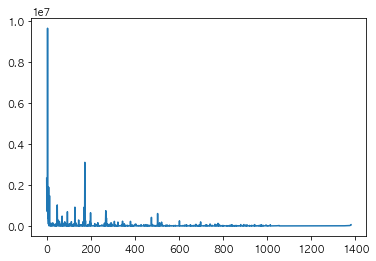

In [29]:
df['노출수'].plot()
plt.show()

- 조금 더 명확한 패턴이 보일 수 있도록 그래프의 데이터 시각화 옵션을 지정
  - 현재는 index를 기준으로 출력
  - value를 기준으로 출력

In [30]:
imp_sort = df['노출수'].sort_values()

In [31]:
imp_sort # 오름차순 정렬

1057       1001
445        1003
597        1005
983        1006
442        1007
         ...   
13      1470452
9       1887822
0       2319456
173     3095998
4       9626374
Name: 노출수, Length: 1381, dtype: int64

In [32]:
imp_sort = imp_sort.reset_index() # index 재생성

In [33]:
imp_sort

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
...,...,...
1376,13,1470452
1377,9,1887822
1378,0,2319456
1379,173,3095998


In [34]:
# 컬럼 삭제
imp_sort.drop('index', axis=1) 

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007
...,...
1376,1470452
1377,1887822
1378,2319456
1379,3095998


In [36]:
imp_sort # 원본에서는 index 컬럼이 삭제되지 않은 것을 확인할 수 있음 

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
...,...,...
1376,13,1470452
1377,9,1887822
1378,0,2319456
1379,173,3095998


In [37]:
# 원본에서 컬럼 삭제하기 
imp_sort.drop('index', axis=1, inplace=True) 

In [39]:
imp_sort

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007
...,...
1376,1470452
1377,1887822
1378,2319456
1379,3095998


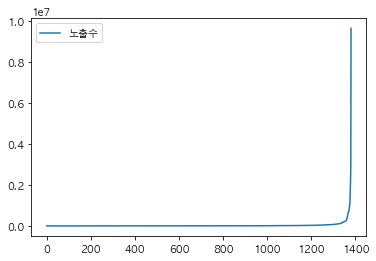

In [40]:
imp_sort.plot()
plt.show()

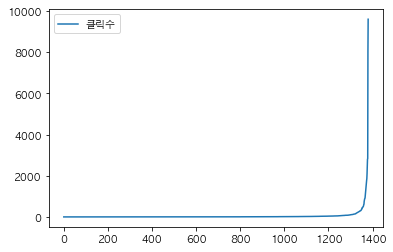

In [44]:
# 클릭수 컬럼 시각화 - 한 줄 코딩으로
(((df['클릭수'].sort_values()).reset_index()).drop('index', axis=1)).plot()
plt.show()

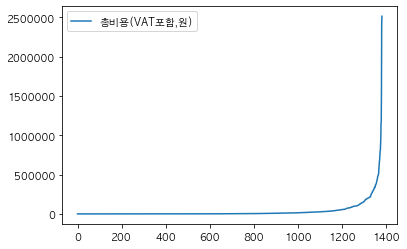

In [46]:
# 총비용 컬럼 시각화
(((df['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('index', axis=1)).plot()
plt.show()

---

### 데이터 분석
  - Pandas를 이용하여 데이터 분석 실습 진행

### 중점관리키워드 추출
  - 노출수, 클리수 기준 상위 5% 키워드 추출
    1. 95 백분위수 찾기(`quantitle 함수`)
    2. 95 백분위수 이상(상위 5%)의 노출수 추출
    3. 상쉬 5%에 해당하는 키워드 추출

In [48]:
# 백분위 구하기 
imp = df['노출수']

In [50]:
# 95백분위수 찾기 - quantile() 함수 : 분위수 출력(default: 2분위수(중앙값))
imp.quantile()

3805.0

In [51]:
# 중앙값(median)
imp.median()

3805.0

In [52]:
# 최소값 - quantile(0) 함수에 0 입력
print(imp.quantile(0))
print(imp.min())

1001.0
1001


In [53]:
# 최대값 - quantile(1) 함수에 1 입력
print(imp.quantile(1))
print(imp.max())

9626374.0
9626374


In [54]:
# 95백분위수 = quantile(0.95)
imp.quantile(0.95)

82858.0

In [56]:
# 95백분위수 이상(상위 5%) 노출수 추출
imp = imp[imp >= imp.quantile(0.95)]
print(imp)

0      2319456
4      9626374
9      1887822
173    3095998
Name: 노출수, dtype: int64


#### 상위 5%에 해당하는 키워드 추출
  - DataFrame의 기본 숫자인덱스 -> '키워드'로 재설정

In [65]:
# 원본 데이터 확인
# df.head()

In [60]:
df_index = df.set_index('키워드')

In [64]:
# df_index

In [62]:
imp = df_index['노출수']
imp = imp[imp >= imp.quantile(0.95)]

In [63]:
imp

키워드
-         2319456
-          767491
일러스트      1137840
-          694106
HTML      9626374
           ...   
부동산스터디     196862
가상메모리       94933
프로모션        82858
앱스토어       126393
OS          90041
Name: 노출수, Length: 70, dtype: int64